In [2]:
from PIL import Image
import pytesseract
import numpy as np
import cv2

Rotating the file and saving the rotated image

In [ ]:
## Rotation and skewing the image


import cv2
import numpy as np
from scipy.ndimage import interpolation as inter

def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
              borderMode=cv2.BORDER_REPLICATE)

    return best_angle, rotated

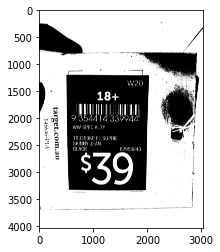

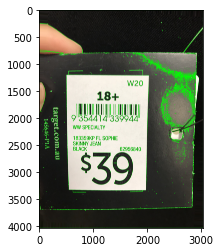

['ahs a', '', 'olin ernie', '', '18+', '', 'MUU', "9°3544)14'33", '', 'WW SPECIALTY', '', '183359KP FL SOPHIE', 'SKINNY JEAN', '', 'UU', '', '9944', '', ' ', '', '|', '', 'BLACK 62956840', '', ' ', '\x0c']


In [44]:

import os
import matplotlib.pyplot as plt
img = cv2.imread('rotated_1.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    path = '/Users/muzammil/Data/Back_Up_Muzammil/LEARNING/Colakin_Assignment/task1/preprocess'
    cv2.imwrite(os.path.join(path , 'processed_image.jpg'), img)
    return img

im_gray = gray(img)

_, binary = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY_INV)

# plotting the gray image 
plt.imshow(binary, cmap="gray")
plt.show()
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# drawing all the contours
image = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
plt.imshow(image)
plt.show()

# Printing the results
text = pytesseract.image_to_string(image)
text = text.split('\n')
print(text)

In [43]:
import os
import matplotlib.pyplot as plt
img = cv2.imread('rotated.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    path = '/Users/muzammil/Data/Back_Up_Muzammil/LEARNING/Colakin_Assignment/task1/preprocess'
    cv2.imwrite(os.path.join(path , 'processed_image.jpg'), img)
    return img

im_gray = gray(img)
ret, imgf = cv2.threshold(im_gray, 0, 255,cv2.THRESH_BINARY,cv2.THRESH_OTSU) #imgf contains Binary image

imgf = cv2.adaptiveThreshold(im_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) #imgf contains Binary image

In [16]:
##2

image = cv2.imread('IMG_1472.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
binary_image = cv2.threshold(gray_image ,100,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#Inverting the image
inverted_bin = cv2.bitwise_not(binary_image)
 
#Some noise reduction
kernel = np.ones((2,2),np.uint8)
processed_img = cv2.erode(inverted_bin, kernel, iterations = 1)
processed_img = cv2.dilate(processed_img, kernel, iterations = 1)
 
#Applying image_to_string method
text = pytesseract.image_to_string(processed_img)
text = text.split('\n')

print(text)

[' ', '', 'f CTL', 'a MA |', '', '8146', 'ne ne ere', 'aa Sua', '4150181072', '', 'aya Leer', '', '  ', '', ' ', '\x0c']


In [17]:
import cv2
import os
img = cv2.imread("IMG_1472.jpeg")

def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    path = '/Users/muzammil/Data/Back_Up_Muzammil/LEARNING/Colakin_Assignment/task1/preprocess'
    cv2.imwrite(os.path.join(path , 'waka_1.jpg'), img)
    return img

# blur
def blur(img) :
    img_blur = cv2.GaussianBlur(img,(5,5),0)
    cv2.imwrite(r"./preprocess/img_blur_1.png",img)    
    return img_blur

# threshold
def threshold(img):
    #pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]    
    cv2.imwrite(r"./preprocess/img_threshold_1.png",img)
    return img

im_gray = gray(img)
im_blur = blur(im_gray)
im_thresh = threshold(im_blur)
contours, _ = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
text = pytesseract.image_to_string(im_thresh)
text = text.split('\n')
print(text)

In [38]:
image = cv2.imread('IMG_1458.jpeg')
angle, rotated = correct_skew(image)
print(angle)
cv2.imshow('rotated', rotated)
cv2.imwrite('rotated_1.jpeg', rotated)

-5


True

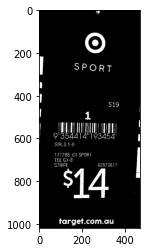

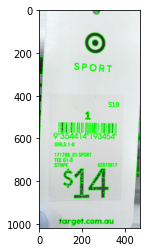

©

SPORT

$19

sure

171788_01 SPORT
EE G1-8
IPE 62673617

farget.com.au



In [4]:
## 3 

import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('rotated.png')

# Thinning and Skeletonization

# kernel = np.ones((5,5),np.uint8)
# img = cv2.erode(img,kernel,iterations = 1)
# plt.imshow(img)
# plt.show()


def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    path = '/Users/muzammil/Data/Back_Up_Muzammil/LEARNING/Colakin_Assignment/task1/preprocess'
    cv2.imwrite(os.path.join(path , 'processed_image.jpg'), img)
    return img

im_gray = gray(img)

_, binary = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY_INV)

# plotting the gray image 
plt.imshow(binary, cmap="gray")
plt.show()
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# drawing all the contours
image = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
plt.imshow(image)
plt.show()

# Printing the results
text = pytesseract.image_to_string(image)

print(text)

In [9]:
x = text.split('\n')